In [2]:
#Data Imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Viz Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader
import pandas.io.data as pdweb

# For time 
from datetime import datetime

# For division
from __future__ import division
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Snatching some stock data

stock_list=['TM','F','GM','TSLA']

end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

for stock in stock_list:
    globals() [stock] = DataReader(stock,'yahoo',start,end)
    
adj_close=pdweb.get_data_yahoo(stock_list,start,end)['Adj Close']

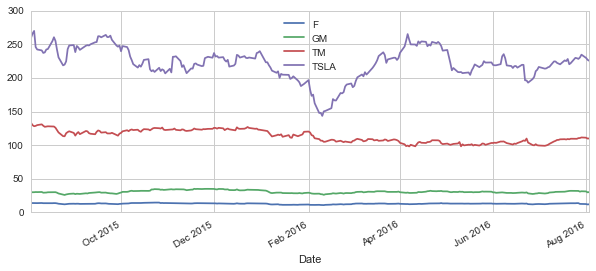

In [8]:
adj_close.plot(subplots=False,figsize=(10,4))

In [9]:
volume=pdweb.get_data_yahoo(stock_list,start,end)['Volume']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a86d390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11acb6110>], dtype=object)

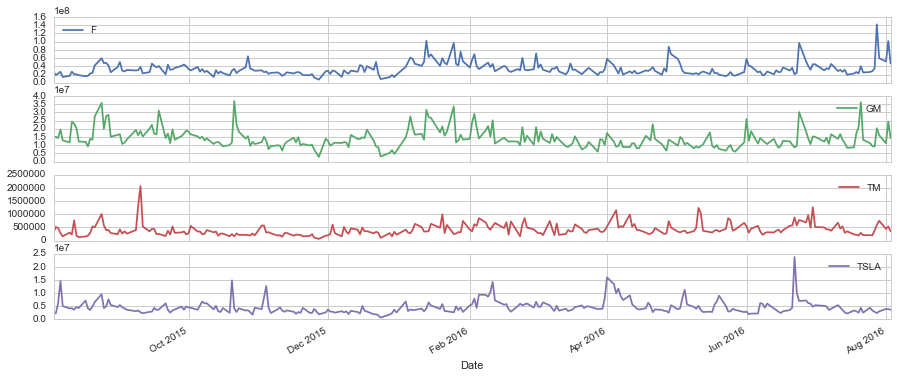

In [10]:
volume.plot(subplots=True,figsize=(15,6))

In [17]:
daily_return=adj_close.pct_change()
daily_return.head()

,F,GM,TM,TSLA
Date,,,,
2015-08-03,NaN,NaN,NaN,NaN
2015-08-04,-0.002008,-0.005051,-0.025004,0.024193
2015-08-05,-0.007378,0.002538,-0.011860,0.014458
2015-08-06,0.002027,0.008228,0.003897,-0.088846
2015-08-07,-0.002023,-0.003767,0.008850,-0.014708


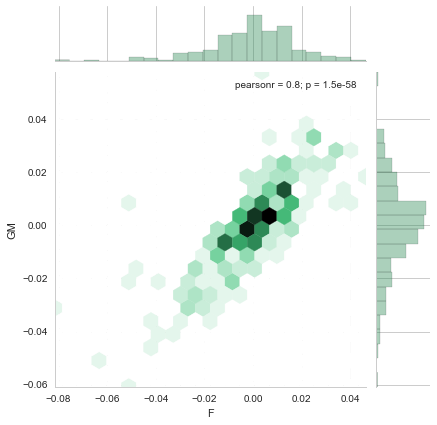

In [18]:
sns.jointplot('F','GM',daily_return,kind='hex',color='seagreen')

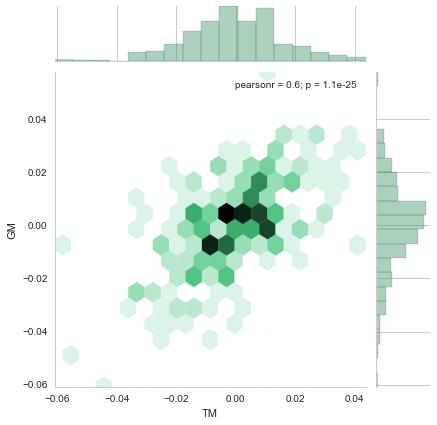

In [21]:
sns.jointplot('TM','GM',daily_return,kind='hex',color='seagreen')

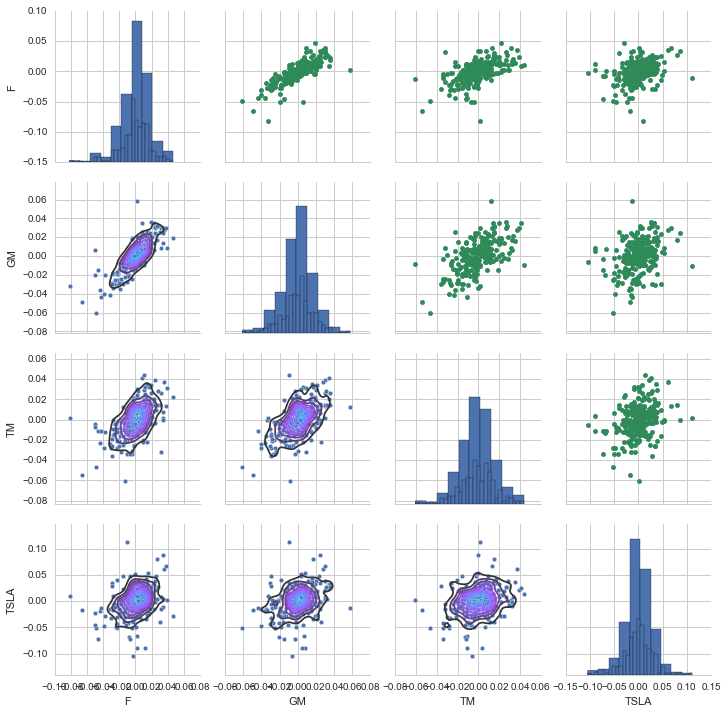

In [24]:
returns_fig=sns.pairplot(daily_return.dropna())

returns_fig.map_upper(plt.scatter,color='seagreen')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)



In [27]:
daily_return['TM'].quantile(.05)

-0.026793033268546516

In [28]:
daily_return['TSLA'].quantile(.05)

-0.046496344563425038

In [29]:
daily_return['GM'].quantile(.05)

-0.029263296787399872

In [30]:
daily_return['F'].quantile(.05)

-0.029104235282458535

In [42]:
#moving average

ma_day=[20,40,60]

for ma in ma_day:
    column_name='MA for %s Days' %(str(ma))
    
TSLA['column_name']=pd.rolling_mean(TSLA['Adj Close'],ma)

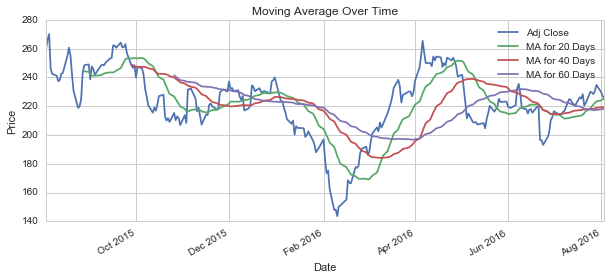

In [44]:
TSLA[['Adj Close', 'MA for 20 Days','MA for 40 Days','MA for 60 Days']].plot(subplots=False,figsize=(10,4))
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Moving Average Over Time')

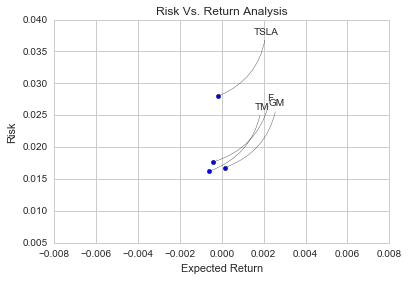

In [59]:


plt.scatter(daily_return.mean(),daily_return.std())
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.title('Risk Vs. Return Analysis')

for label, x, y in zip(daily_return.columns, daily_return.mean(), daily_return.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (60, 60),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-.3'))